### Image classification using MNIST dataset in Neural Network 
1. Classification of MNIST image dataset 
2. Using Keras classfication model 
3. Train and Predict Model images 

In [1]:
#Importing libraries 
import numpy as np 
import matplotlib.pyplot as plt 
from keras.datasets import mnist

2025-10-26 09:51:49.340325: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-26 09:51:54.581277: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-26 09:52:42.985909: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [28]:
# Load dataset 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# x, y, z ==> 3D Images 
print(x_train.shape)

(60000, 28, 28)


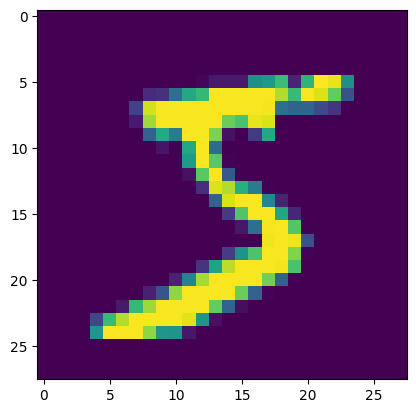

In [41]:
# Show first row image (handwritten)
plt.imshow(x_train[0])

In [ ]:
# Images features and pre-processing
# Converting 3D dimensions to 2D (Flatten Images)
n_features = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape(x_train.shape[0], n_features).astype('float32')
x_test = x_test.reshape(x_test.shape[0], n_features).astype('float32')


In [50]:
# Target feature into categorial values 
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# Making classification model 
from keras.models import Sequential
from keras.layers import Dense, Input

# classes in output
n_classes = y_train.shape[1]

def classification_model():
    model = Sequential()
    model.add(Input(shape= (n_features,)))
    model.add(Dense(n_features, activation= 'relu'))
    model.add(Dense(100, activation= 'relu'))
    model.add(Dense(n_classes, activation= 'softmax'))

    model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])
    return model

model = classification_model()

In [72]:
# Model fit and prediction 
training = model.fit(x_train, y_train, validation_data= (x_test, y_test), epochs= 10, verbose= 2)

Epoch 1/10


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(32, 10, 2), output.shape=(32, 10)